In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [3]:
df = pd.read_csv("data-fire.csv")

In [4]:
df.head(5)

,Номер пожара,Дата,X,Y,"Площадь, га","температура, °С","относительная влажность, %","влажность почвы (в слое 0-10см), %","атмосферное давление, мбар",Тип растительности
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес


In [5]:
df.shape

(49, 10)

Переводим название на английский язык

In [6]:
df.rename(columns={df.columns[0]:'fire numbers',
                    df.columns[1]:'date',
                    df.columns[4]:'area',
                    df.columns[5]:'temp',
                    df.columns[6]:'humidity',
                    df.columns[7]:'soil_moisture',
                    df.columns[8]:'atm_pressure',
                    df.columns[9]:'V_type'},
                    inplace=True)

In [7]:
df.head(5)

,fire numbers,date,X,Y,area,temp,humidity,soil_moisture,atm_pressure,V_type
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire numbers   49 non-null     int64  
 1   date           49 non-null     object 
 2   X              49 non-null     float64
 3   Y              49 non-null     float64
 4   area           49 non-null     int64  
 5   temp           49 non-null     float64
 6   humidity       49 non-null     float64
 7   soil_moisture  49 non-null     float64
 8   atm_pressure   49 non-null     float64
 9   V_type         49 non-null     object 
dtypes: float64(6), int64(2), object(2)
memory usage: 4.0+ KB


In [9]:
df.describe()

,fire numbers,X,Y,area,temp,humidity,soil_moisture,atm_pressure
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,139643.653061,47.183271,42.488180,97.836735,16.025878,48.957143,27.438571,887.863265
std,99941.919391,0.574760,0.486414,184.406407,8.884035,16.539549,7.554540,76.999674
min,13167.000000,45.830200,41.595000,3.000000,-2.390000,20.100000,14.080000,752.500000
25%,26566.000000,46.829700,42.163600,12.000000,12.219000,37.100000,21.780000,807.500000
50%,143057.000000,47.456200,42.333100,26.000000,14.382000,48.100000,27.470000,910.300000
75%,204400.000000,47.664300,42.883500,90.000000,19.844000,60.500000,30.730000,953.500000
max,293489.000000,47.834500,43.369900,961.000000,33.758000,90.700000,43.770000,1023.600000


## 2 Визуализация

In [10]:
df['V_type'].value_counts()

Луг                 26
Лиственный лес      22
Темнохвойный лес     1
Name: V_type, dtype: int64

<AxesSubplot:xlabel='V_type', ylabel='count'>

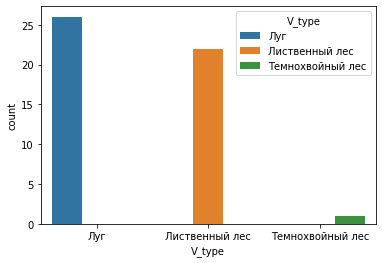

In [11]:
sns.countplot(x=df["V_type"],hue=df["V_type"])

In [12]:
df["month_f"]=df['date'].apply(lambda date:int(date.split("/")[0]))

In [13]:
df.head(5)

,fire numbers,date,X,Y,area,temp,humidity,soil_moisture,atm_pressure,V_type,month_f
0,203679,7/5/2020,47.4856,42.9225,961,33.758,20.1,16.29,953.5,Луг,7
1,220864,7/30/2020,47.5192,42.8835,39,29.325,30.1,20.07,962.1,Луг,7
2,203570,7/5/2020,47.5200,42.8793,85,33.758,20.1,16.29,953.5,Луг,7
3,264514,10/1/2020,47.5151,42.8768,5,19.844,47.0,22.71,959.2,Луг,10
4,192992,6/15/2020,47.5627,42.6358,7,28.925,34.9,17.16,910.3,Лиственный лес,6


In [14]:
def to_month(num_month):
    month = ['jan','fab','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    return month[num_month-1]

def to_day_week(date):
    month = int(date.split('/')[0])
    day = int(date.split('/')[1])
    year = int(date.split('/')[2])
    today = datetime.datetime(year,month,day)
    num_day_week = today.weekday()
    days_week = ['mon','tue','wed','thu','fri','sat','sun']
    return days_week[num_day_week]

## 2.3 кол-во прожаров по месяцам каждой ростительности

<AxesSubplot:xlabel='month_f', ylabel='count'>

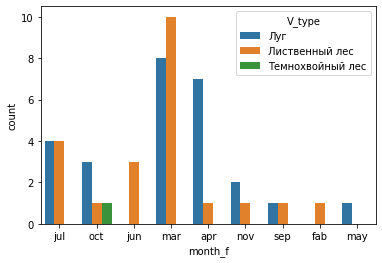

In [15]:
sns.countplot(x=df['month_f'].apply(lambda num_month: to_month(num_month)),hue=df["V_type"])

## 2.4 количество ростительности оп дням недели каждой ростительности

<AxesSubplot:xlabel='date', ylabel='count'>

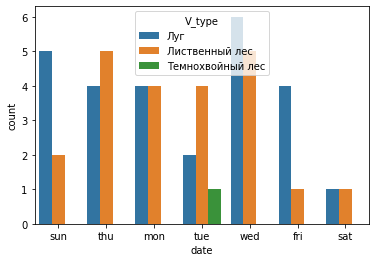

In [16]:
sns.countplot(x=df["date"].apply(lambda date:to_day_week(date)),hue=df["V_type"])

Text(0.5, 1.0, 'Распределение пожаров')

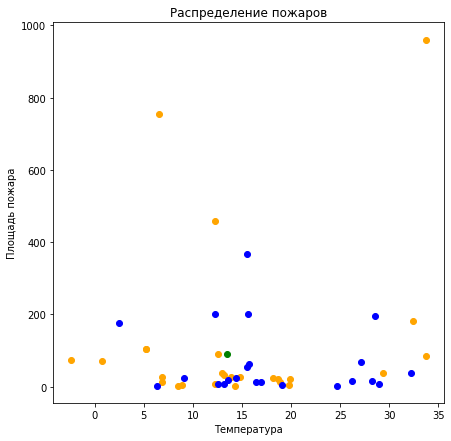

In [17]:
lugs = df[(df['V_type'] == 'Луг')]
d_forest = df[(df['V_type'] == 'Лиственный лес')]
dc_forest = df[(df['V_type'] == 'Темнохвойный лес')]

plt.figure(figsize=(7,7))
plt.scatter(lugs['temp'],lugs['area'],color="orange",label = 'Луг')
plt.scatter(d_forest['temp'],d_forest['area'],color="blue",label = 'Лиственный лес')
plt.scatter(dc_forest['temp'],dc_forest['area'],color="green",label = 'Темнохвойный лес')
plt.xlabel("Температура")
plt.ylabel("Площадь пожара")
plt.title("Распределение пожаров")

In [20]:
def forecast_area(date,X,Y,temp,humidity,soil_moisture,atm_pressure,V_type):
    df = pd.read_csv("data-fire.csv")
    df.rename(columns={df.columns[0]:'fire_numbers',
                    df.columns[1]:'date',
                    df.columns[4]:'area',
                    df.columns[5]:'temp',
                    df.columns[6]:'humidity',
                    df.columns[7]:'soil_moisture',
                    df.columns[8]:'atm_pressure',
                    df.columns[9]:'V_type'},
                    inplace=True)
    df.drop(['fire_numbers',"X","Y","date"],axis=1,inplace=True)

    df = df[(df['V_type'] == V_type )]

    df["V_type"] = df["V_type"].map({"Луг" : 0,"Лиственный лес":1,"Темнохвойный лес":2})


    Data = [['1', date, X, Y, '0', temp, humidity, soil_moisture, atm_pressure, V_type]]
    df_test = pd.DataFrame(Data, columns=['fire_numbers', 'date', 'X', 'Y', 'area', 
                   'temp', 'humidity', 'soil_moisture', 'atm_pressure', 'V_type'])
    
    df_test.drop(['fire_numbers', 'X', 'Y', 'date'], axis=1, inplace=True)
    df_test['V_type'] = df_test['V_type'].map({'Луг': 0, 'Лиственный лес': 1, 'Темнохвойный лес': 2})
    
    y_train = df['area'].astype('int')
    X_train = df.drop('area', axis=1)
    y_valid = df_test['area'].astype('int')
    X_valid = df_test.drop('area', axis=1)
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    area_fire_pred = model.predict(X_valid)[0]
    
    if area_fire_pred < 0:
        area_fire_pred = 0
        
    accuracy = model.score(X_train, y_train)
    
    return (area_fire_pred, accuracy)


In [21]:
print(forecast_area('8/9/2021', 42.940179, 47.519348, 29, 50, 9, 1007, 'Луг'))

(43.38673459560869, 0.17556074256004206)
